# Investment Analysis Assignment¶


### Assignment Brief:
You work for Spark Funds, an asset management company. Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.

### constraints:

It wants to invest between 5 to 15 million USD per round of investment

It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in

Compony Investment Stratergy:

Spark Funds wants to invest where most other investors are investing. This pattern is often observed among early stage startup investors.

### Goal of the Data Analysis:

1) Investment type analysis
2) Country analysis
3) Sector analysis

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Checkpoint Part 1:

#### Load the companies and rounds data (provided on the previous page) into two data frames and name them companies and rounds2 respectively.

In [2]:
#import dataset
companies = pd.read_csv('companies.csv', encoding = 'ISO-8859-1')

In [3]:
rounds2 = pd.read_csv('rounds2.csv', encoding = 'ISO-8859-1')

In [4]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [5]:
companies.shape

(66368, 10)

In [6]:
rounds2.shape

(114949, 6)

#### Missing Value Treatment

In [7]:
#check missing values
rounds2['company_permalink'].isnull().sum()

0

In [8]:
#Question 1::How many unique companies are present in rounds2?
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower() # convert all the rounds2 permalink to lower
number = len(rounds2['company_permalink'].unique())

In [9]:
number

66370

In [10]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [11]:
# check missing values
companies['permalink'].isnull().sum()

0

In [12]:
# Q2:: How many unique companies are present in the companies file?
companies['permalink'] = companies['permalink'].str.lower() # convert all the companies permalink to lower

number2 = len(companies['permalink'].unique())

In [13]:
number2

66368

In [14]:
#Q3::Are there any companies in the rounds2 file which are not  present in companies ?
set1 = set(rounds2['company_permalink'].unique()).difference(set(companies['permalink']))

In [15]:
len(set1)

7

#### Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame ?


In [16]:
#Q3:: Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame ?
master_frame = pd.merge(rounds2, companies, how = 'left', left_on = 'company_permalink', right_on = 'permalink')
len(master_frame.index)

114949

In [17]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


#### clean master_frame

In [18]:
#check missing values
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      7
name                           8
homepage_url                6139
category_list               3414
status                         7
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20527
dtype: int64

In [19]:
#Inspecting the Null values percentage again after deletion, column-wise
print(round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2))

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.01
name                        0.01
homepage_url                5.34
category_list               2.97
status                      0.01
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.86
dtype: float64


'raised_amount_usd' is a required column for analysis. Blank or null values in this field can either be deleted or imputed statistically.
Here, choosing to remove these values for analysis as it accounts for 17% of data.



In [20]:
#remove the column having 17% null values
master_frame_1 = master_frame[~(master_frame['raised_amount_usd'].isnull())]
print(round(100*(master_frame_1.isnull().sum()/len(master_frame_1.index)), 2))

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         70.34
funded_at                   0.00
raised_amount_usd           0.00
permalink                   0.00
name                        0.00
homepage_url                4.56
category_list               1.10
status                      0.00
country_code                6.16
state_code                  8.01
region                      7.42
city                        7.42
founded_at                 16.81
dtype: float64


In [21]:
#print number of retained rows
print(100*(len(master_frame_1.index)/len(master_frame.index)))


82.60967907506807


In [22]:
# since funding_round_code','founded_at','homepage_url are not required for further analysis, so we remove them
master_frame_1 = master_frame_1.drop(['funding_round_code','founded_at','homepage_url'], axis=1)

In [23]:
# remove rows with null values in country code
master_frame_1=master_frame_1[~master_frame_1.country_code.isnull()]


In [24]:
# remove rows with null values in category_list
master_frame_1=master_frame_1[~master_frame_1.category_list.isnull()]


In [25]:
master_frame_1.shape

(88529, 13)

In [26]:
master_frame_1.isnull().sum()

company_permalink             0
funding_round_permalink       0
funding_round_type            0
funded_at                     0
raised_amount_usd             0
permalink                     0
name                          1
category_list                 0
status                        0
country_code                  0
state_code                 1731
region                     1184
city                       1181
dtype: int64

In [27]:
master_frame_1['funding_round_type'].value_counts()

venture                  47809
seed                     21095
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64

In [28]:
round(100*(master_frame_1.isnull().sum()/len(master_frame_1.index)), 2)


company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
category_list              0.00
status                     0.00
country_code               0.00
state_code                 1.96
region                     1.34
city                       1.33
dtype: float64

### Checkpoint 2: Funding Type Analysis


### Subtask 2.1: Retaining the rows with only four investment types.
Spark Funds wants to choose one of these four investment types(venture, angel, seed, and private equity) for each potential investment they will make. So let's observe and see how many funding types are present in master_frame_1 and then retain the rows with above-mentioned investment types.

In [29]:
master_frame_1['funding_round_type'].unique()


array(['venture', 'seed', 'undisclosed', 'convertible_note',
       'private_equity', 'debt_financing', 'angel', 'grant',
       'equity_crowdfunding', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'secondary_market',
       'non_equity_assistance'], dtype=object)

In [30]:
list1 = ['seed', 'angel','venture', 'private_equity']
fund_type = master_frame_1[master_frame_1['funding_round_type'].isin(list1)]

In [31]:
fund_type.shape

(75124, 13)

In [32]:
fund_type['funding_round_type'].value_counts()

venture           47809
seed              21095
angel              4400
private_equity     1820
Name: funding_round_type, dtype: int64

Subtask 2.2: Calculate the average investment amount for each of the four funding types.

Average funding amount of venture type
Average funding amount of seed type
Average funding amount of angel type
Average funding amount of private_equity type

In [33]:
#Representative funding amount of four investment types

round(fund_type.groupby('funding_round_type')['raised_amount_usd'].mean(), 2)


funding_round_type
angel               971573.89
private_equity    73938486.28
seed                747793.68
venture           11724222.69
Name: raised_amount_usd, dtype: float64

Clearly, Venture type of investment is the ideal investment type for Spark Funds. It satisfy the investment constrain of investment of 5M to 15M USD.



In [34]:
round(fund_type.groupby('funding_round_type')['raised_amount_usd'].median(), 2)


funding_round_type
angel               414906.0
private_equity    20000000.0
seed                300000.0
venture            5000000.0
Name: raised_amount_usd, dtype: float64

### Checkpoint Part 2


#### Checkpoint 3: Country Analysis


Further filtering the data so that it only contains the data for the investment type i.e venture



In [35]:
venture_data = master_frame_1[master_frame_1['funding_round_type'] =='venture']

In [36]:
venture_data.shape

(47809, 13)

In [37]:
venture_data.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,state_code,region,city
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View


In [38]:
venture_country = venture_data.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending = False)

In [39]:
#Finding top 9 countries which have received the highest total funding. This can be done by looking at the aggregation of the raised amount in each country.

venture_country.head(9)

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.226851e+09
ISR    6.854350e+09
DEU    6.306922e+09
JPN    3.167647e+09
Name: raised_amount_usd, dtype: float64

In [40]:
top9 = venture_data[venture_data['country_code'].isin(["USA","CHN","GBR","IND","CAN","FRA","ISR","DEU","JPN"])]

In [41]:
top9.shape

(44118, 13)

From the Wiki Link  provided, USA, GBR and IND are top 3 English Speaking countries

In [42]:
# Filter the rows having top3 english speakig countries
top3 = venture_data[venture_data['country_code'].isin(['USA', 'GBR','IND'])]

### Checkpoint 4: Sector Analysis 1

In [43]:
#import mapping dataset
mapping = pd.read_csv('mapping.csv')

Data Cleaning: For further analysis and mapping, removing the null rows from the mapping dataframe.



In [44]:
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [45]:
# removing 1 missing value from category list
mapping=mapping[~mapping.category_list.isnull()]
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0


In [46]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0


In [47]:
top3

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,state_code,region,city
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114920,/organization/zyomyx-inc,/funding-round/4191cb5258d3863b0212d1083881da64,venture,30-06-2013,12000000.0,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,MO,MO - Other,Fremont
114922,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,11-07-2013,14219999.0,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,MO,MO - Other,Fremont
114923,/organization/zyomyx-inc,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,29-01-2010,555016.0,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,MO,MO - Other,Fremont
114934,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,140500.0,/organization/zyrra,Zyrra,E-Commerce,operating,USA,MA,Boston,Cambridge


In [48]:
top3.shape

(38803, 13)

Also, for some companies, the category list is a list of multiple sub-sectors separated by a pipe (vertical bar |). For example, one of the companies’ category_list is Application Platforms|Real Time|Social Network Media.

 

You discuss with the CEO and come up with the business rule that the first string before the vertical bar will be considered the primary sector. In the example above, ‘Application Platforms’ will be considered the primary sector.

In [49]:
#Extract the primary sector of each category list from the category_list column
top3['primary_sector'] =top3['category_list'].astype(str).apply(lambda x: x.split('|')[0])


C:\Users\AAwasthi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [50]:
top3['primary_sector'].unique()

array(['Media', 'Analytics', 'Apps', 'Education', 'Curated Web',
       'Health Care', 'Software', 'Biotechnology', 'Enterprise Software',
       'Service Providers', 'Manufacturing', 'Advertising', 'Internet',
       'Clean Technology', 'Health and Wellness', 'E-Commerce', 'News',
       'Art', 'Big Data', 'Finance', 'EdTech', 'Computers',
       'Cloud Computing', 'Hardware + Software', 'Internet of Things',
       'Cloud Infrastructure', 'Messaging', 'Information Technology',
       'Consumer Electronics', 'Data Centers', 'Android',
       'Customer Service', '3D Technology', '3D', 'Games', 'Drones',
       '3D Printing', 'Automated Kiosk', 'Music', 'Web Hosting',
       'Cloud Data Services', 'Consulting', 'Physical Security',
       'Security', 'Databases', 'Flash Storage', 'Machine Learning',
       'Commercial Real Estate', 'Anything Capital Intensive',
       'Automotive', 'Ad Targeting', 'Office Space', 'Online Shopping',
       'Mobile', 'Accounting', 'B2B', 'Nanotechnology',

In [51]:
top3.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,state_code,region,city,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,Media
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,Apps


In [52]:
## Function to correct the mapping data.It can be observed fromt the data 
##that at many places in the category_class column the 'na' is misprinded as '0'
## Eg. 'Analysis' is present as 'A0lysis'
def spellcheck(category):
## Function to correct the mapping data.It can be observed fromt the data 
##that at many places in the category_class column the 'na' is misprinded as '0'
## Eg. 'Analysis' is present as 'A0lysis'
    if '0' in category:
        if category.startswith("0"):    # Handle 0notechnology case with capital Na
            return category[:category.find('0')]+'Na'+category[category.find('0')+1:]
        elif category.endswith("0"):    # ignores the 2.0 case with 0 at the end of the string
            return category
        else:
            return category[:category.find('0')]+'na'+category[category.find('0')+1:]
    else:
        return category


In [53]:
# calling the custom function to correct the category_list column in the mapping.
mapping['category_list']=list(map(spellcheck,mapping['category_list']))


In [54]:
mapping.columns

Index(['category_list', 'Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

Mapping the category_list in the top3 dataframe to the main_sector in the mapping file. Before merging these two dataframe, creating a new column main_sector in mapping dataframe to get the main sector name of each category.

In [55]:
m=pd.melt(mapping, id_vars=['category_list'], var_name=['main_sector'])
m=m[m.value==1]
m=m.drop('value',axis=1)
m.shape

(687, 2)

In [56]:
m

,category_list,main_sector
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports
...,...,...
6112,Social Recruiting,"Social, Finance, Analytics, Advertising"
6113,Social Television,"Social, Finance, Analytics, Advertising"
6114,Social Travel,"Social, Finance, Analytics, Advertising"
6125,Stock Exchanges,"Social, Finance, Analytics, Advertising"


Mapping the category list with top3 dataframe

In [57]:
master_frame2=pd.merge(top3,m,how="left",left_on="primary_sector",right_on="category_list")

In [58]:
master_frame2=master_frame2.drop('category_list_y',axis=1)


In [59]:
master_frame2.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,state_code,region,city,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,Media,Entertainment
1,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics,"Social, Finance, Analytics, Advertising"
2,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics,"Social, Finance, Analytics, Advertising"
3,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics,"Social, Finance, Analytics, Advertising"
4,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,Apps,"News, Search and Messaging"


In [60]:
master_frame2['main_sector'].head()


0                              Entertainment
1    Social, Finance, Analytics, Advertising
2    Social, Finance, Analytics, Advertising
3    Social, Finance, Analytics, Advertising
4                 News, Search and Messaging
Name: main_sector, dtype: object

In [61]:
master_frame2.shape

(38803, 15)

Checking for null in the main_sector column of the merged data frame.



In [62]:
master_frame2.isnull().sum()


company_permalink            0
funding_round_permalink      0
funding_round_type           0
funded_at                    0
raised_amount_usd            0
permalink                    0
name                         0
category_list_x              0
status                       0
country_code                 0
state_code                  72
region                     156
city                       156
primary_sector               0
main_sector                 12
dtype: int64

In [63]:
#removing 12 null values in main_sector
master_frame2=master_frame2[~(master_frame2['main_sector'].isnull())]


#### Creating three separate data frames D1, D2 and D3 for each of the top three countries (USA, GBR, IND) containing the observations of funding type venture falling within the 5-15 million USD range.



## USA

In [64]:
D1=master_frame2[master_frame2['country_code']=='USA']


In [65]:
D1 = D1[(D1['raised_amount_usd'] >= 5000000) & (D1['raised_amount_usd'] <= 15000000)]


In [66]:
D1

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,state_code,region,city,primary_sector,main_sector
3,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics,"Social, Finance, Analytics, Advertising"
4,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,Apps,"News, Search and Messaging"
17,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,16-12-2014,11999347.0,/organization/128-technology,128 Technology,Service Providers|Technology,operating,USA,MA,Boston,Burlington,Service Providers,Others
20,/organization/1366-technologies,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,15-10-2013,15000000.0,/organization/1366-technologies,1366 Technologies,Manufacturing,operating,USA,MA,Boston,Bedford,Manufacturing,Manufacturing
21,/organization/1366-technologies,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,09-04-2015,5000000.0,/organization/1366-technologies,1366 Technologies,Manufacturing,operating,USA,MA,Boston,Bedford,Manufacturing,Manufacturing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38791,/organization/zynga,/funding-round/8411431b5a0389a874e3fae93016c089,venture,24-04-2010,15000000.0,/organization/zynga,Zynga,Facebook Applications|Games|Networking|Technology,ipo,USA,CA,SF Bay Area,San Francisco,Facebook Applications,"Social, Finance, Analytics, Advertising"
38794,/organization/zynga,/funding-round/eb198261da812bc8d3bf475ccec44000,venture,12-02-2008,5026000.0,/organization/zynga,Zynga,Facebook Applications|Games|Networking|Technology,ipo,USA,CA,SF Bay Area,San Francisco,Facebook Applications,"Social, Finance, Analytics, Advertising"
38798,/organization/zyomyx-inc,/funding-round/4191cb5258d3863b0212d1083881da64,venture,30-06-2013,12000000.0,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,MO,MO - Other,Fremont,Biotechnology,Cleantech / Semiconductors
38799,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,11-07-2013,14219999.0,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,MO,MO - Other,Fremont,Biotechnology,Cleantech / Semiconductors


In [67]:
D1['raised_amount_usd'].sum()

107757097294.0

In [68]:
D1['raised_amount_usd'].count()

12063

In [69]:
D1.shape


(12063, 15)

In [70]:
D1['raised_amount_usd'].sum()

107757097294.0

#### Finding the top sectors with the highest number of investments in USA.



In [71]:
D1_by_sector_count=D1.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending = False)

In [72]:
D1_by_sector_count

main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
News, Search and Messaging                 1583
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: raised_amount_usd, dtype: int64

In [73]:
D1_by_sector_amt = D1.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending = False)

In [74]:
D1_by_sector_amt

main_sector
Others                                     2.632101e+10
Social, Finance, Analytics, Advertising    2.380738e+10
Cleantech / Semiconductors                 2.163343e+10
News, Search and Messaging                 1.397157e+10
Health                                     8.211859e+09
Manufacturing                              7.258553e+09
Entertainment                              5.099198e+09
Automotive & Sports                        1.454104e+09
Name: raised_amount_usd, dtype: float64

In [75]:
D1[D1['main_sector'] == 'Others'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending= False)

permalink
/organization/virtustream            64300000.0
/organization/capella                54968051.0
/organization/airtight-networks      54201907.0
/organization/decarta                52100000.0
/organization/black-duck-software    51000000.0
                                        ...    
/organization/capton                  5000000.0
/organization/capital-teas            5000000.0
/organization/campus-quad             5000000.0
/organization/campus-explorer         5000000.0
/organization/netqos                  5000000.0
Name: raised_amount_usd, Length: 2049, dtype: float64

In [76]:
D1[D1['main_sector'] == 'Social, Finance, Analytics, Advertising'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending= False)

permalink
/organization/shotspotter         67933006.0
/organization/demandbase          63000000.0
/organization/intacct             61800000.0
/organization/netbase             60600000.0
/organization/lotame              59700000.0
                                     ...    
/organization/logi-analytics       5000000.0
/organization/smartturn            5000000.0
/organization/fractal-sciences     5000000.0
/organization/amtec-lcc            5000000.0
/organization/initiate-systems     5000000.0
Name: raised_amount_usd, Length: 1847, dtype: float64

In [77]:
D1[D1['main_sector'] == 'Cleantech / Semiconductors'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending= False)

permalink
/organization/biodesix                 75300000.0
/organization/tigo-energy              68739496.0
/organization/forsight-labs            61300001.0
/organization/cambrios-technologies    56891022.0
/organization/rheonix                  56124758.0
                                          ...    
/organization/chil-semiconductor        5000000.0
/organization/rfs-pharma                5000000.0
/organization/gt-urological             5000000.0
/organization/hadron-systems            5000000.0
/organization/1bog                      5000000.0
Name: raised_amount_usd, Length: 1615, dtype: float64

## GBR (United Kingdom)

In [78]:
D2=master_frame2[master_frame2['country_code']=='GBR']


In [79]:
D2 = D2[(D2['raised_amount_usd'] >= 5000000) & (D2['raised_amount_usd'] <= 15000000)]


In [80]:
D2['raised_amount_usd'].sum()

5379078691.0

In [81]:
D2['raised_amount_usd'].count()

621

In [82]:
D2.shape


(621, 15)

In [83]:
D2['raised_amount_usd'].sum()

5379078691.0

#### Finding the top sectors with the highest number of investments in GBR.


In [84]:
D2_by_sector_count=D2.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending = False)

In [84]:
D2_by_sector_count

main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: raised_amount_usd, dtype: int64

In [85]:
D2_by_sector_amt = D2.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending = False)

In [86]:
D2_by_sector_amt

main_sector
Others                                     1.283624e+09
Cleantech / Semiconductors                 1.163990e+09
Social, Finance, Analytics, Advertising    1.089404e+09
News, Search and Messaging                 6.157462e+08
Entertainment                              4.827847e+08
Manufacturing                              3.619403e+08
Health                                     2.145375e+08
Automotive & Sports                        1.670516e+08
Name: raised_amount_usd, dtype: float64

In [86]:
D2[D2['main_sector'] == 'Others'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending= False)

permalink
/organization/electric-cloud             37000000.0
/organization/sensage                    36250000.0
/organization/enigmatic                  32500000.0
/organization/silverrail-technologies    29000000.0
/organization/opencloud                  27972766.0
                                            ...    
/organization/parcelgenie                 5000000.0
/organization/vector-watch                5000000.0
/organization/thefilter                   5000000.0
/organization/udex                        5000000.0
/organization/bacula-systems              5000000.0
Name: raised_amount_usd, Length: 120, dtype: float64

In [87]:
D2[D2['main_sector'] == 'Social, Finance, Analytics, Advertising'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending= False)

permalink
/organization/celltick-technologies    37500000.0
/organization/mythings                 34000000.0
/organization/zopa                     32900000.0
/organization/imagini                  28550000.0
/organization/marketinvoice            25553007.0
                                          ...    
/organization/moo                       5000000.0
/organization/rangespan                 5000000.0
/organization/tamoco                    5000000.0
/organization/the-fizzback-group        5000000.0
/organization/duedil                    5000000.0
Name: raised_amount_usd, Length: 104, dtype: float64

In [89]:
D2[D2['main_sector'] == 'Cleantech / Semiconductors'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending= False)

permalink
/organization/eusa-pharma                                                      35600000.0
/organization/horizon-discovery                                                31353719.0
/organization/f-star-biotechnologische-forschungs-und-entwicklungsges-m-b-h    29132906.0
/organization/elixent                                                          25000000.0
/organization/takeda-cambridge                                                 22340000.0
                                                                                  ...    
/organization/lamellar-biomedical                                               5301059.0
/organization/mmic-solutions                                                    5250000.0
/organization/flowline                                                          5104587.0
/organization/ignis-energy                                                      5014644.0
/organization/exco-intouch                                                      5000000.0


## India (IND)


In [90]:
D3=master_frame2[master_frame2['country_code']=='IND']


In [91]:
D3 = D3[(D3['raised_amount_usd'] >= 5000000) & (D3['raised_amount_usd'] <= 15000000)]


In [92]:
D3['raised_amount_usd'].sum()

2949543602.0

In [93]:
D3['raised_amount_usd'].count()

328

In [94]:
D3.shape


(328, 15)

In [95]:
D3['raised_amount_usd'].sum()

2949543602.0

#### Finding the top sectors with the highest number of investments in IND.


In [96]:
D3_by_sector_count=D3.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending = False)

In [97]:
D3_by_sector_count

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: raised_amount_usd, dtype: int64

In [98]:
D3_by_sector_amt = D3.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending = False)

In [99]:
D3_by_sector_amt

main_sector
Others                                     1.013410e+09
Social, Finance, Analytics, Advertising    5.505496e+08
News, Search and Messaging                 4.338345e+08
Entertainment                              2.808300e+08
Manufacturing                              2.009000e+08
Health                                     1.677400e+08
Cleantech / Semiconductors                 1.653800e+08
Automotive & Sports                        1.369000e+08
Name: raised_amount_usd, dtype: float64

In [100]:
D3[D3['main_sector'] == 'Others'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending= False)

permalink
/organization/firstcry-com           39000000.0
/organization/myntra                 38000000.0
/organization/commonfloor            32900000.0
/organization/pepperfry-com          28000000.0
/organization/itzcash-card-ltd       25000000.0
                                        ...    
/organization/reznext                 5000000.0
/organization/voonik-com              5000000.0
/organization/vedantu-innovations     5000000.0
/organization/securens                5000000.0
/organization/liases-foras            5000000.0
Name: raised_amount_usd, Length: 88, dtype: float64

In [101]:
D3[D3['main_sector'] == 'Social, Finance, Analytics, Advertising'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending= False)

permalink
/organization/manthan-systems                                 50700000.0
/organization/komli-media                                     28000000.0
/organization/shopclues-com                                   25000000.0
/organization/intarvo                                         21900000.0
/organization/grameen-financial-services                      21556050.0
/organization/bankbazaar                                      19000000.0
/organization/microland                                       18300000.0
/organization/eka-software-solutions                          16000000.0
/organization/qyuki                                           15400000.0
/organization/financial-information-network-operations-pvt    15000000.0
/organization/travelguru                                      15000000.0
/organization/shiram-credit                                   15000000.0
/organization/apnaloan                                        15000000.0
/organization/capital-float              

In [102]:
D3[D3['main_sector'] == 'News, Search and Messaging'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending= False)

permalink
/organization/gupshup-technology-india-pvt-ltd    33000000.0
/organization/imimobile                           23000000.0
/organization/sms-gupshup                         22000000.0
/organization/hike                                21000000.0
/organization/roadrunnr                           21000000.0
/organization/matrimony-com                       20400000.0
/organization/guruji                              15000000.0
/organization/bluestone-com                       15000000.0
/organization/mobile2win-india                    15000000.0
/organization/quikr-india                         14000000.0
/organization/bharat-matrimony                    11750000.0
/organization/teledna                             10490000.0
/organization/babajob                             10000000.0
/organization/money-on-mobile                     10000000.0
/organization/fourinteractive                     10000000.0
/organization/just-dial                           10000000.0
/organization/

# Plots

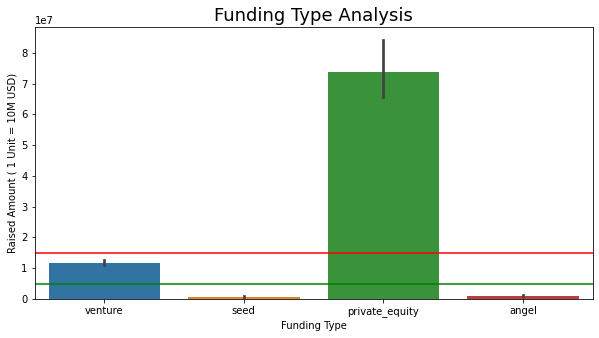

In [101]:
plt.figure(figsize=(10,5))
g = sns.barplot(data = fund_type, x='funding_round_type', y='raised_amount_usd')
g.set(xlabel='Funding Type', ylabel='Raised Amount ( 1 Unit = 10M USD)')
g.set_title('Funding Type Analysis',fontsize =18)

plt.axhline(5000000, color='green')
plt.axhline(15000000, color='red')


plt.show()

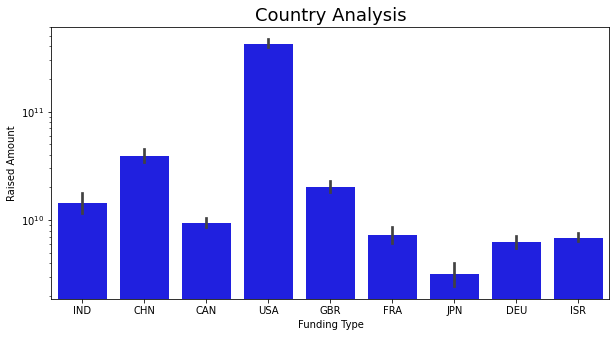

In [102]:
# bar plot with default statistic=mean
plt.figure(figsize=(10,5))
c=sns.barplot(x='country_code', y='raised_amount_usd', data=top9, estimator=np.sum, color='blue')
#c.set_ylim(0, 100000000000)
c.set_yscale('log')
c.set(xlabel='Funding Type', ylabel='Raised Amount')
c.set_title('Country Analysis',fontsize =18)
plt.show()

A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type i.e venture)

For this plot creating a master dataframe with all the data for the top 3 sectors of the top 3 countries.

In [103]:
master_D=D1[D1['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]


In [104]:
master_D=master_D.append(D2[D2['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])], ignore_index=True)


In [105]:
master_D=master_D.append(D3[D3['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])], ignore_index=True)


In [106]:
master_D.shape

(8646, 15)

### Using the master_D dataframe to plot the sector wise investment count of the top 3 sectors of the top3 countries.



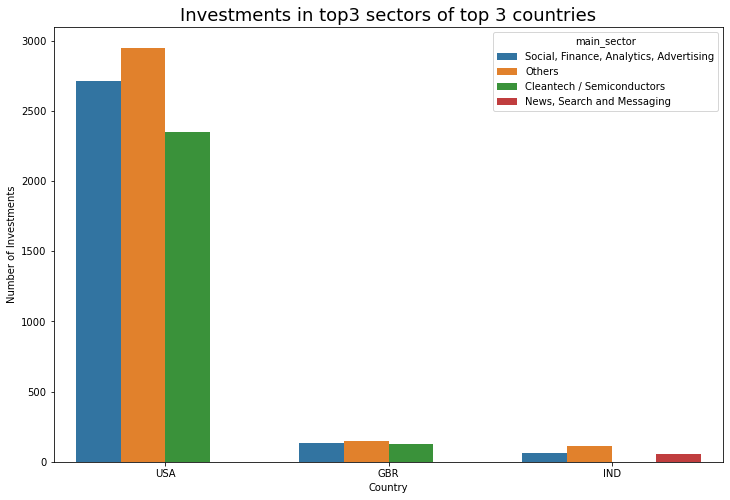

In [107]:
# set figure size for larger figure
plt.figure(figsize=(12, 8))

# specify hue="categorical_variable"
s=sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", data=master_D, estimator=lambda x: len(x))
s.set(xlabel='Country', ylabel='Number of Investments')
s.set_title('Investments in top3 sectors of top 3 countries',fontsize =18)
plt.show()